https://www.kaggle.com/hypnobear/absenteeism-at-work-dataset

https://www.kaggle.com/chetnasureka/absenteeismatwork/kernels

https://www.kaggle.com/shreytiwari/name-na

https://www.kaggle.com/miner16078/zenith-classification-and-clustering

https://www.kaggle.com/tejprash/theaggregatr-assign6

https://www.kaggle.com/kerneler/starter-absenteeism-at-work-7c360987-f

https://www.kaggle.com/dweepa/outliers-assign6


# Compare Machine Learning Algorithms

It is important to compare the performance of multiple diferent machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple diferent machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and diferent
algorithms to compare. After completing this lesson you will know:
1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

# Choose The Best Machine Learning Model

When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have diferent performance characteristics. Using resampling
methods like cross-validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.
When you have a new dataset, it is a good idea to visualize the data using diferent techniques
in order to look at the data from diferent perspectives. The same idea applies to model selection.
You should use a number of diferent ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithms to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.


## Compare Machine Learning Algorithms Consistently
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six diferent classification
algorithms are compared on a single dataset:

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly congured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [1]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('Absenteeism_at_work.csv')

In [3]:
data.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,29,8


In [4]:
print(data.shape)

(740, 15)


In [6]:
array = data.values
X = array[:,0:15]
Y = array[:,14]

In [7]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [11]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-pa

LR: 0.610811 (0.072973)
LDA: 0.427027 (0.055455)
KNN: 0.366216 (0.031663)
CART: 0.986486 (0.010468)
NB: 0.983784 (0.014554)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/pyth

SVM: 0.306757 (0.044430)


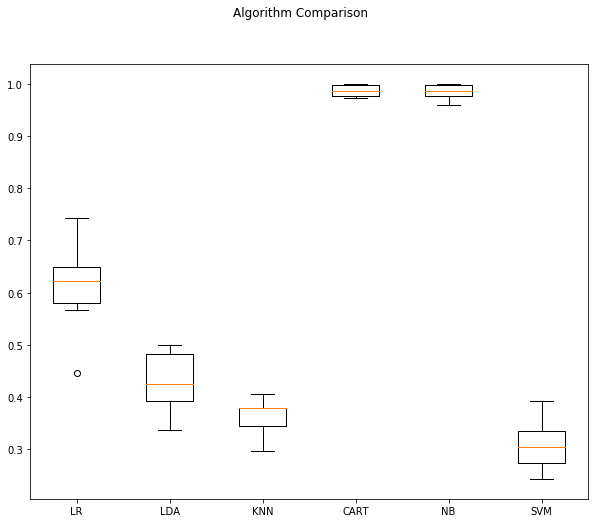

In [14]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()